<a href="https://colab.research.google.com/github/PJoshuaz/Trabalhos/blob/main/ProjetoOTEB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#adicionando pandas para manipular os dados da planilha de clientes da empresa
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#puxando a planilha da minha conta do google drive
from google.colab import drive
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
Data = pd.read_excel(r'/content/gdrive/My Drive/ProjetoPy/LISTA DE VENDA Nº 1017 31.07.2023 atualizado1.xlsx')

In [ ]:
caminho_arquivo_excel = '/content/gdrive/My Drive/ProjetoPy/LISTA DE VENDA Nº 1017 31.07.2023 atualizado1.xlsx'

# Cria um DataFrame a partir do arquivo Excel
df = pd.read_excel(caminho_arquivo_excel)

nome_da_aba_empresa = 'Table 1'

# Carrega o DataFrame da aba específica
try:
    df_empresa = pd.read_excel(caminho_arquivo_excel, sheet_name=nome_da_aba_empresa)
except pd.errors.SheetNameNotFound:
    raise ValueError(f"A aba '{nome_da_aba_empresa}' não foi encontrada no arquivo Excel.")

# Exibir as primeiras linhas do DataFrame para verificar se os dados foram carregados corretamente
print(df_empresa.head())

  EMPRESA    PLACA                 MODELO    COR  ANO FAB  ANO MOD     KM  \
0     CSF  RIJ2I75  208 LIKE PACK 1.6 MEC  PRATA     2021     2022  21699   
1     CSF  RII4B25  208 LIKE PACK 1.6 MEC  PRATA     2021     2022  31461   
2     CSF  RIH5D95  208 LIKE PACK 1.6 MEC  PRETA     2021     2022  32706   
3     CSF  RIH7B05  208 LIKE PACK 1.6 MEC  PRETA     2021     2022  33652   
4     CSF  RII0C85  208 LIKE PACK 1.6 MEC  PRETA     2021     2022  35830   

       PÁTIO          FIPE  VALOR MÍNIMO        MARGEM AÇÃO CARTÃO FOTOS  \
0  FORTALEZA  R$ 70.412,00  R$ 58.400,00  R$ 12.012,00   1X DIRETO   NÃO   
1  FORTALEZA  R$ 70.412,00  R$ 58.260,00  R$ 12.152,00   1X DIRETO   NÃO   
2  FORTALEZA  R$ 70.412,00  R$ 58.260,00  R$ 12.152,00   1X DIRETO   NÃO   
3  FORTALEZA  R$ 70.412,00  R$ 57.800,00  R$ 12.612,00   1X DIRETO   NÃO   
4  FORTALEZA  R$ 70.412,00  R$ 58.400,00  R$ 12.012,00   1X DIRETO   NÃO   

  Unnamed: 13  
0         NaN  
1         NaN  
2         NaN  
3         NaN  


In [ ]:

# Tratamento de Tipo de Dados
df_empresa['ANO FAB'] = pd.to_numeric(df_empresa['ANO FAB'], errors='coerce')
df_empresa['ANO MOD'] = pd.to_numeric(df_empresa['ANO MOD'], errors='coerce')
df_empresa['KM'] = pd.to_numeric(df_empresa['KM'], errors='coerce')
df_empresa['FIPE'] = pd.to_numeric(df_empresa['FIPE'], errors='coerce')
df_empresa['VALOR MÍNIMO'] = pd.to_numeric(df_empresa['VALOR MÍNIMO'], errors='coerce')
df_empresa['MARGEM'] = pd.to_numeric(df_empresa['MARGEM'], errors='coerce')
df_empresa['AÇÃO CARTÃO'] = pd.to_numeric(df_empresa['AÇÃO CARTÃO'], errors='coerce')

# Remover Colunas Vazias
df_empresa = df_empresa.dropna()

# Exibe as informações do DataFrame
print(df_empresa.info())

df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   EMPRESA       0 non-null      object 
 1   PLACA         0 non-null      object 
 2   MODELO        0 non-null      object 
 3   COR           0 non-null      object 
 4   ANO FAB       0 non-null      int64  
 5   ANO MOD       0 non-null      int64  
 6   KM            0 non-null      float64
 7   PÁTIO         0 non-null      object 
 8   FIPE          0 non-null      float64
 9   VALOR MÍNIMO  0 non-null      float64
 10  MARGEM        0 non-null      float64
 11  AÇÃO CARTÃO   0 non-null      float64
 12  FOTOS         0 non-null      object 
 13  Unnamed: 13   0 non-null      object 
dtypes: float64(5), int64(2), object(7)
memory usage: 0.0+ bytes
None


In [ ]:
print("Colunas presentes no DataFrame:")
print(df_empresa.columns)

Colunas presentes no DataFrame:
Index(['EMPRESA', 'PLACA', 'MODELO', 'COR', 'ANO FAB', 'ANO MOD', 'KM',
       'PÁTIO', 'FIPE', 'VALOR MÍNIMO', 'MARGEM', 'AÇÃO CARTÃO', 'FOTOS',
       'Unnamed: 13'],
      dtype='object')


In [ ]:
# Carrega o DataFrame
try:
    df_empresa = pd.read_excel(caminho_arquivo_excel, sheet_name=nome_da_aba_empresa)
except pd.errors.SheetNameNotFound:
    raise ValueError(f"A aba '{nome_da_aba_empresa}' não foi encontrada no arquivo Excel.")

# Ajusta o nome da coluna de modelo, se necessário
if 'MODELO' not in df_empresa.columns:
    raise ValueError("A coluna 'MODELO' não foi encontrada no DataFrame.")

# Agrupa por modelo e encontra a maior margem
maior_margem_por_modelo = df_empresa.groupby('MODELO')['MARGEM'].max()

# Exibe a maior margem por modelo
print(maior_margem_por_modelo.head(30))

MODELO
208 LIKE PACK 1.6 MEC                           R$ 8.772,00
AMAROK CD S 2.0 16V 4X4 MEC                    R$ 52.596,00
AMAROK CD SE 2.0 4X4 MEC                       R$ 61.994,00
CERATO SX 2.0 AUT                              R$ 25.666,00
COMPASS LONGITUDE 2.0 4X4 TURBO DIESEL AUT     R$ 30.754,00
COROLLA XEI 2.0 AUT                            R$ 16.548,00
CRONOS 1.3 MEC                                  R$ 8.798,00
CRONOS DRIVE 1.3 MEC                            R$ 8.753,00
DAILY CHASSI 70-170 MEC                        R$ 21.093,00
DOBLO ESSENCE 1.8 16V 7L MEC                   R$ 32.555,00
DUCATO EXECUTIVO 2.3 MEC                        R$ 6.332,00
DUSTER DYNAMIQUE 2.0 4X4 MEC                   R$ 28.231,00
DUSTER EXPRESSION 1.6 MEC                      R$ 28.793,00
DUSTER ZEN 1.6 MEC                             R$ 38.704,00
EXPERT BUSINESS PACK 1.6 TURBO DIESEL          R$ 20.495,00
F-4000 4x4 2P (DIESEL)(E5)                    -R$ 54.114,00
FIORINO 1.4 MEC                  

Carros com Menos KM:
                                   MODELO       KM
741   L200 CD TRITON SPORT GL 2.4 4X4 MEC      0.0
1569                 XTZ CROSSER 150S ABS   4727.0
67                DAILY CHASSI 70-170 MEC   5702.0
129                    DUSTER ZEN 1.6 MEC   8559.0
546                           GOL 1.0 MEC   9850.0
1428                   VOYAGE MSI 1.6 MEC   9991.0
130                    DUSTER ZEN 1.6 MEC  10001.0


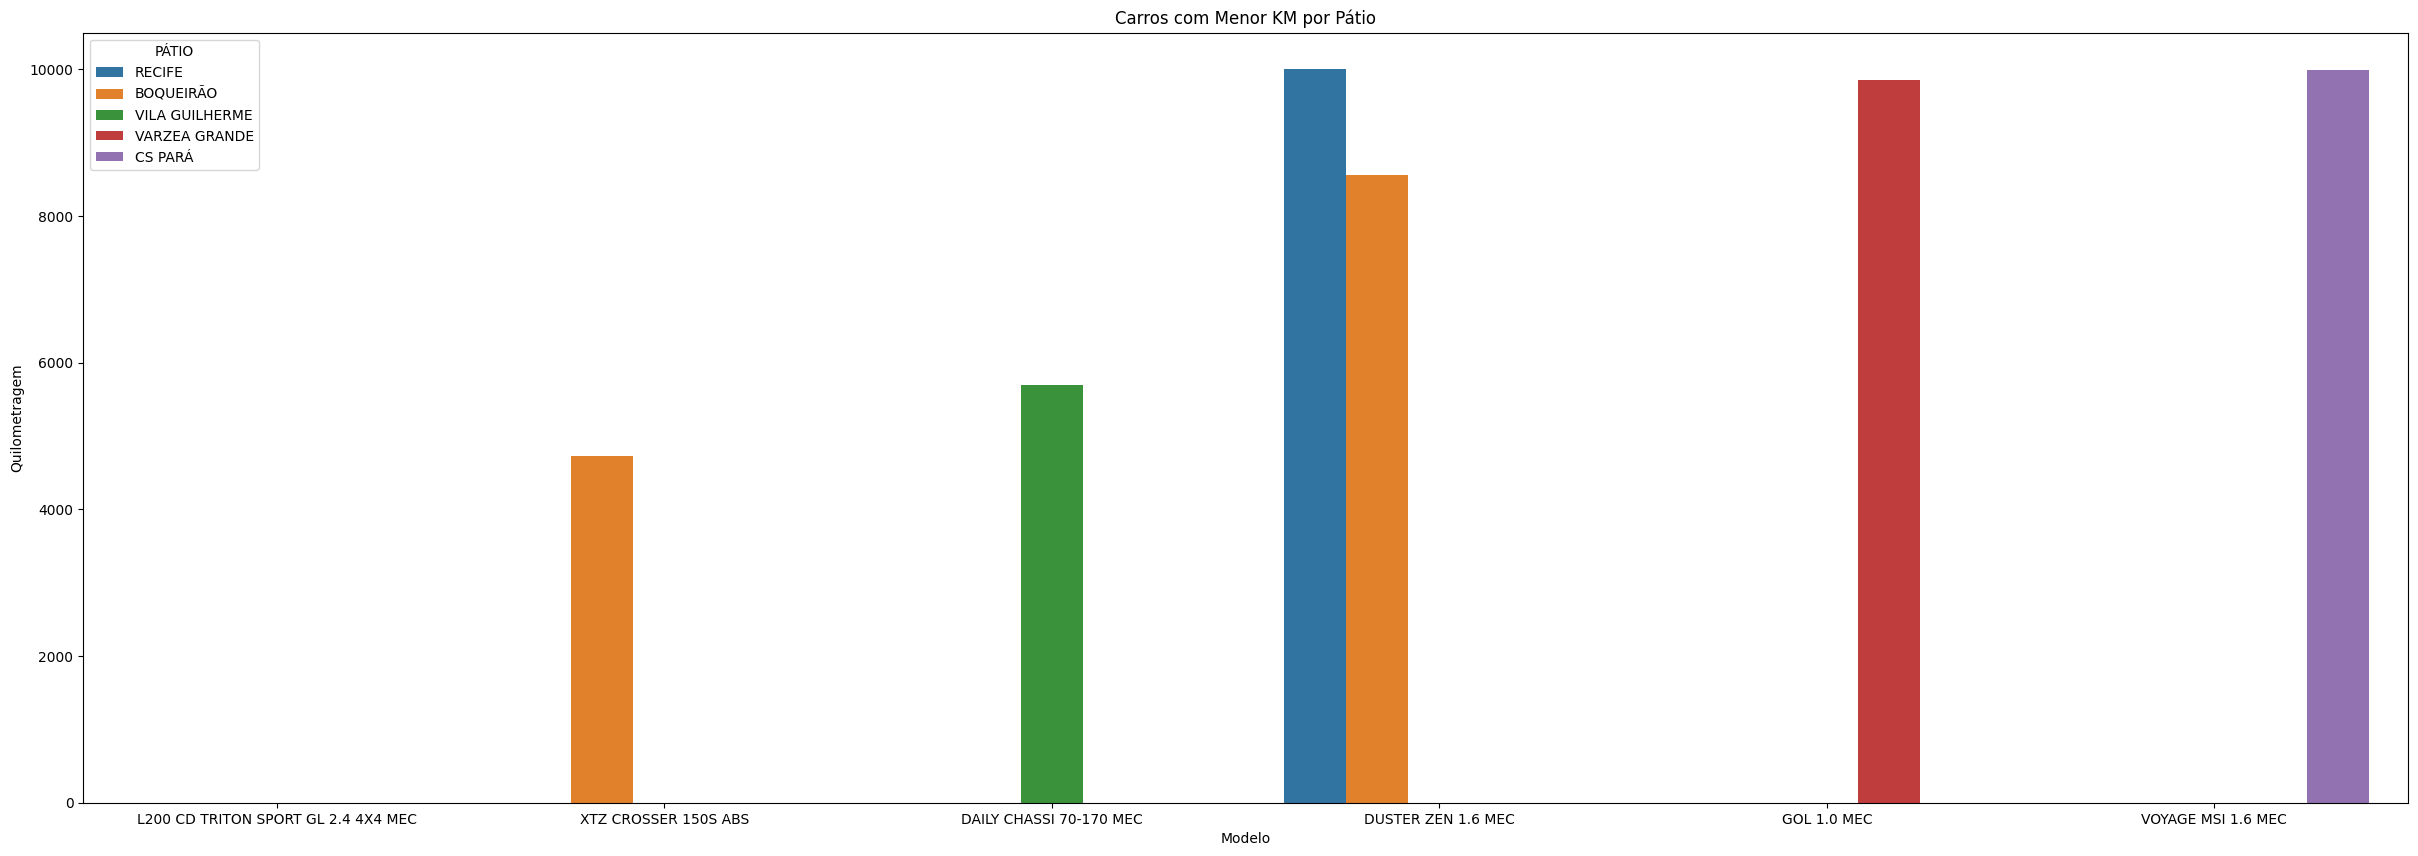

In [ ]:
df_empresa['KM'] = pd.to_numeric(df_empresa['KM'], errors='coerce')

# Encontra os carros com menos KM
carros_com_menos_km = df_empresa.nsmallest(7, 'KM')

# Exibe os carros com menos KM
print("Carros com Menos KM:")
print(carros_com_menos_km[['MODELO', 'KM',]])

#grafico
plt.figure(figsize=(30, 10))
sns.barplot(x='MODELO', y='KM', data=carros_com_menos_km, hue='PÁTIO')
plt.title('Carros com Menor KM por Pátio')
plt.xlabel('Modelo')
plt.ylabel('Quilometragem')
plt.show()

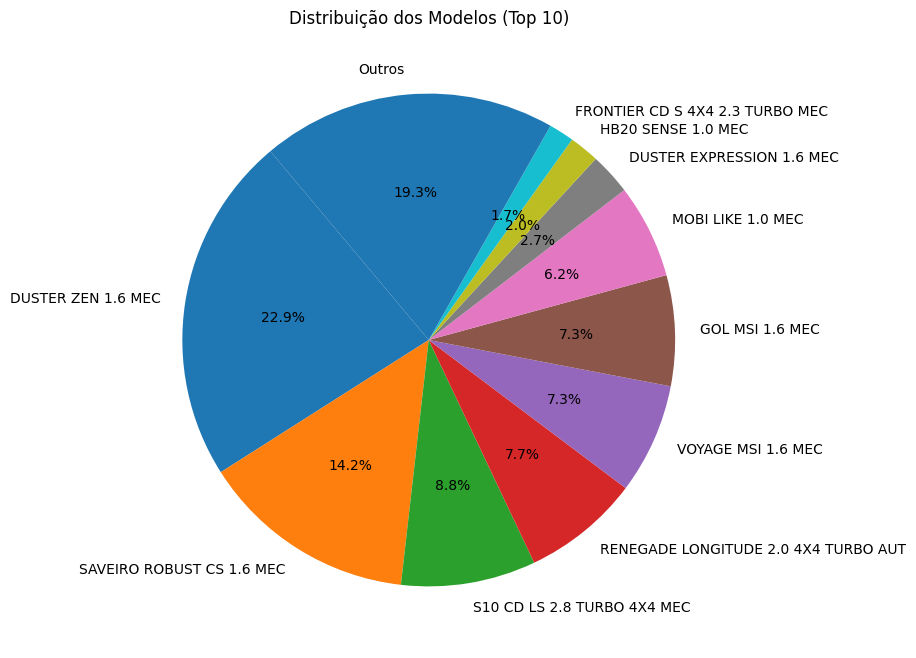

In [ ]:
frequencia_modelos = df_empresa['MODELO'].value_counts()

# Escolhe o número de principais categorias a serem destacadas
top_n = 10

# Agrupa os modelos menos frequentes em 'Outros'
outros = frequencia_modelos[top_n:].sum()

# Cria um novo DataFrame com as principais categorias e 'Outros'
dados_grafico = pd.concat([frequencia_modelos[:top_n], pd.Series(outros, index=['Outros'])])

# Plota o gráfico de pizza
plt.figure(figsize=(30, 8))
plt.pie(dados_grafico, labels=dados_grafico.index, autopct='%1.1f%%', startangle=130)
plt.title('Distribuição dos Modelos (Top 10)')
plt.show()

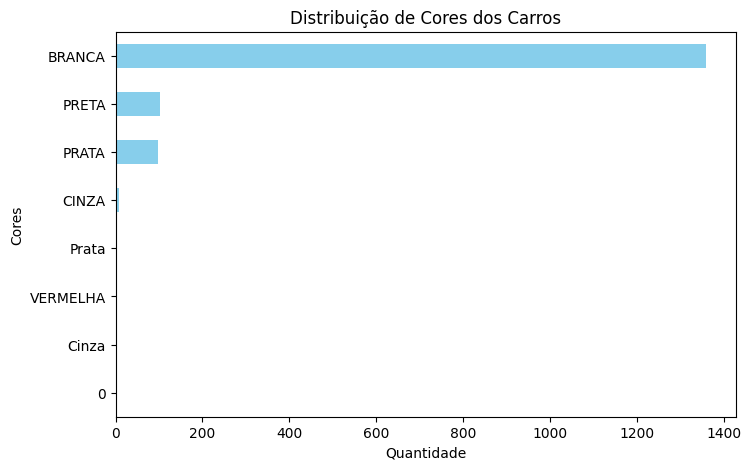

In [ ]:
# Contagem das cores dos carros
contagem_cores = df_empresa['COR'].value_counts()

# Ordena as cores pela contagem
contagem_cores = contagem_cores.sort_values(ascending=True)

# Cria um gráfico de barras horizontais
plt.figure(figsize=(8, 5))
contagem_cores.plot(kind='barh', color='skyblue')

# Adiciona rótulos e título
plt.xlabel('Quantidade')
plt.ylabel('Cores')
plt.title('Distribuição de Cores dos Carros')

# Exibe o gráfico
plt.show()

In [ ]:

# Cria uma tabela menor com as colunas 'MODELO', 'MARGEM' e 'FIPE'
tabela_menor = df_empresa[['MODELO', 'MARGEM', 'FIPE']]

tabela_menor= tabela_menor.head(40)

# Exibe a tabela menor
print(tabela_menor)

                                        MODELO        MARGEM           FIPE
0                        208 LIKE PACK 1.6 MEC  R$ 12.012,00   R$ 70.412,00
1                        208 LIKE PACK 1.6 MEC  R$ 12.152,00   R$ 70.412,00
2                        208 LIKE PACK 1.6 MEC  R$ 12.152,00   R$ 70.412,00
3                        208 LIKE PACK 1.6 MEC  R$ 12.612,00   R$ 70.412,00
4                        208 LIKE PACK 1.6 MEC  R$ 12.012,00   R$ 70.412,00
5                        208 LIKE PACK 1.6 MEC  R$ 12.682,00   R$ 70.412,00
6                        208 LIKE PACK 1.6 MEC  R$ 12.292,00   R$ 70.412,00
7                        208 LIKE PACK 1.6 MEC   R$ 8.772,00   R$ 70.412,00
8                        208 LIKE PACK 1.6 MEC  R$ 13.322,00   R$ 70.412,00
9                        208 LIKE PACK 1.6 MEC  R$ 12.432,00   R$ 70.412,00
10                 AMAROK CD S 2.0 16V 4X4 MEC  R$ 35.176,00  R$ 110.596,00
11                 AMAROK CD S 2.0 16V 4X4 MEC  R$ 52.596,00  R$ 110.596,00
12          

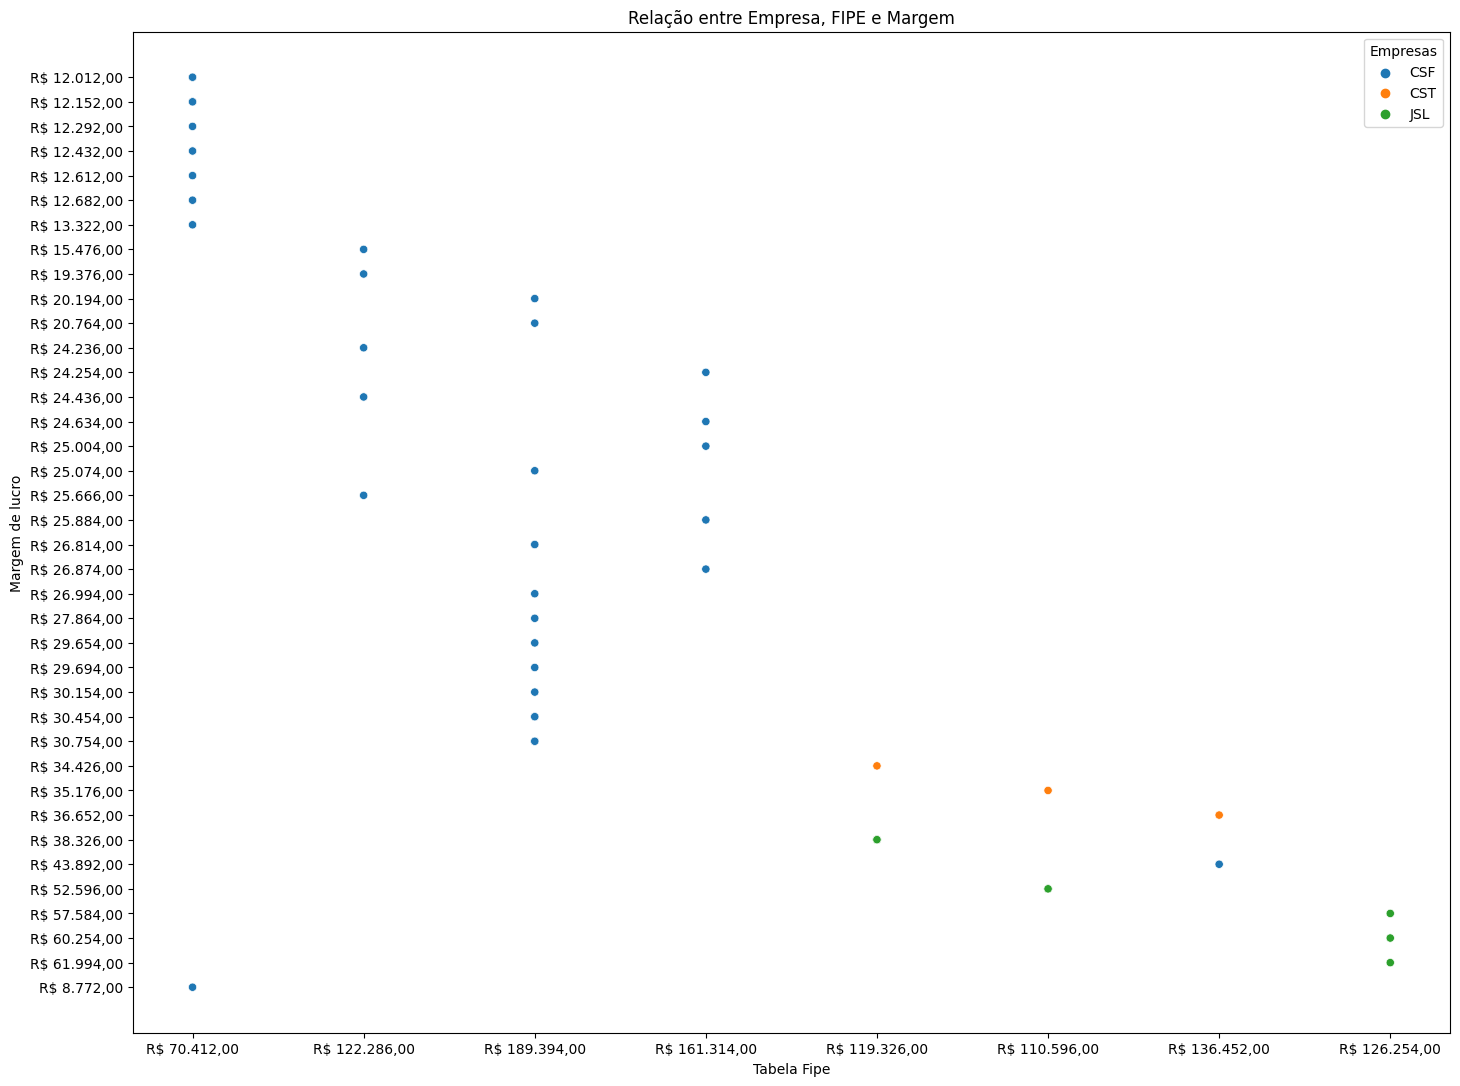

In [ ]:
numero_de_linhas = 50

# Limita a quantidade de dados
df_empresa = df_empresa.head(numero_de_linhas)

# Ordena o DataFrame por margem e FIPE em ordem crescente
df_empresa = df_empresa.sort_values(by=['MARGEM', 'FIPE'])

# Gráfico de dispersão 'EMPRESA' vs 'FIPE' e 'MARGEM'
plt.figure(figsize=(17, 13))
sns.scatterplot(x='FIPE', y='MARGEM', hue='EMPRESA', data=df_empresa)
plt.title('Relação entre Empresa, FIPE e Margem')
plt.xlabel('Tabela Fipe')
plt.ylabel('Margem de lucro')
plt.legend(title='Empresas')
plt.show()